### Fetching and getting acquainted with the data

In [46]:
import pandas as pd

data = pd.read_csv('../data/NYC_Weather_2016_2022.csv')

data.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2016-01-01T00:00,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0
1,2016-01-01T01:00,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0
2,2016-01-01T02:00,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0
3,2016-01-01T03:00,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0
4,2016-01-01T04:00,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0


In [47]:
# Check for missing values
data.isnull().sum()

time                       0
temperature_2m (°C)      168
precipitation (mm)       168
rain (mm)                168
cloudcover (%)           168
cloudcover_low (%)       168
cloudcover_mid (%)       168
cloudcover_high (%)      168
windspeed_10m (km/h)     168
winddirection_10m (°)    173
dtype: int64

In [48]:
# Get basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59760 entries, 0 to 59759
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   59760 non-null  object 
 1   temperature_2m (°C)    59592 non-null  float64
 2   precipitation (mm)     59592 non-null  float64
 3   rain (mm)              59592 non-null  float64
 4   cloudcover (%)         59592 non-null  float64
 5   cloudcover_low (%)     59592 non-null  float64
 6   cloudcover_mid (%)     59592 non-null  float64
 7   cloudcover_high (%)    59592 non-null  float64
 8   windspeed_10m (km/h)   59592 non-null  float64
 9   winddirection_10m (°)  59587 non-null  float64
dtypes: float64(9), object(1)
memory usage: 4.6+ MB


In [49]:
# Get statistical summary of num cols
data.describe()

,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
count,59592.000000,59592.000000,59592.000000,59592.000000,59592.000000,59592.000000,59592.000000,59592.000000,59587.000000
mean,13.247721,0.133713,0.123401,45.448131,25.605702,30.109746,40.287203,11.379841,203.724420
std,9.804465,0.542782,0.525858,38.265304,37.161502,36.839594,42.526615,5.802103,99.719142
min,-18.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.200000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,7.200000,129.000000
50%,13.500000,0.000000,0.000000,35.000000,2.000000,10.000000,20.000000,10.400000,222.000000
75%,21.800000,0.000000,0.000000,89.000000,46.000000,58.000000,92.000000,14.500000,288.000000
max,35.500000,19.200000,19.200000,100.000000,100.000000,100.000000,100.000000,47.200000,360.000000


### Data Preprocessing & Feature Engineering

In [50]:
import numpy as np

# Handle missing values

# data = data.fillna(data.select_dtypes(include=['number']).mean())
# data = data.ffill()

data['time'] = pd.to_datetime(data['time'])

# data['hour'] = data['time'].dt.hour
data['day'] = data['time'].dt.day
# data['month'] = data['time'].dt.month
data['year'] = data['time'].dt.year
# data['day_of_year'] = data['time'].dt.dayofyear  # 1-365

data['hour_sin'] = np.sin(2 * np.pi * data['time'].dt.hour / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['time'].dt.hour / 24)
data['month_sin'] = np.sin(2 * np.pi * (data['time'].dt.month - 1) / 12)
data['month_cos'] = np.cos(2 * np.pi * (data['time'].dt.month - 1) / 12)

data[(data['year'] >= 2016) & (data['year'] <= 2020)].isnull().sum()

time                     0
temperature_2m (°C)      0
precipitation (mm)       0
rain (mm)                0
cloudcover (%)           0
cloudcover_low (%)       0
cloudcover_mid (%)       0
cloudcover_high (%)      0
windspeed_10m (km/h)     0
winddirection_10m (°)    2
day                      0
year                     0
hour_sin                 0
hour_cos                 0
month_sin                0
month_cos                0
dtype: int64

In [51]:
# Create lagged features for temperature
LAGS_NUM = 24
for i in range(1, LAGS_NUM + 1):
    data[f'temp_lag_{i}'] = data['temperature_2m (°C)'].shift(i)

data['target'] = data['temperature_2m (°C)'].shift(-1)

data.dropna(inplace=True)

In [52]:
from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()

numerical_features = ['precipitation (mm)', 'rain (mm)', 'cloudcover (%)', 
                      'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 
                      'windspeed_10m (km/h)', 'winddirection_10m (°)'] + [f'temp_lag_{i}' for i in range(1, LAGS_NUM + 1)]

data[numerical_features] = scaler.fit_transform(data[numerical_features])

with open("../models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

data.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),...,temp_lag_16,temp_lag_17,temp_lag_18,temp_lag_19,temp_lag_20,temp_lag_21,temp_lag_22,temp_lag_23,temp_lag_24,target
24,2016-01-02 00:00:00,3.6,-0.246422,-0.234733,-0.847534,-0.661924,-0.274548,-0.946749,0.709761,0.654930,...,-0.759576,-0.749379,-0.739179,-0.728976,-0.708579,-0.677982,-0.626990,-0.586199,-0.575998,3.1
25,2016-01-02 01:00:00,3.1,-0.246422,-0.234733,-1.187218,-0.688829,-0.817338,-0.946749,0.778698,0.695034,...,-0.759576,-0.759576,-0.749376,-0.739173,-0.728972,-0.708572,-0.677973,-0.626985,-0.586194,2.9
26,2016-01-02 02:00:00,2.9,-0.246422,-0.234733,-1.187218,-0.688829,-0.817338,-0.946749,0.640824,0.654930,...,-0.871739,-0.759576,-0.759572,-0.749370,-0.739169,-0.728965,-0.708562,-0.677967,-0.626979,2.3
27,2016-01-02 03:00:00,2.3,-0.246422,-0.234733,-1.187218,-0.688829,-0.817338,-0.946749,0.709761,0.634878,...,-0.871739,-0.871739,-0.759572,-0.759566,-0.749365,-0.739161,-0.728955,-0.708556,-0.677961,2.0
28,2016-01-02 04:00:00,2.0,-0.246422,-0.234733,-1.187218,-0.688829,-0.817338,-0.946749,0.709761,0.654930,...,-0.861543,-0.871739,-0.871736,-0.759566,-0.759562,-0.749358,-0.739151,-0.728949,-0.708550,1.9


In [53]:
features = numerical_features + ['temperature_2m (°C)', 'day', 'year', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']

train_data = data[(data['year'] >= 2016) & (data['year'] <= 2020)]
val_data = data[data['year'] == 2021]
test_data = data[data['year'] == 2022]

print(f'Training set shape: {train_data.shape}')
print(f'Validation set shape: {val_data.shape}')
print(f'Testing set shape: {test_data.shape}')

Training set shape: (43822, 41)
Validation set shape: (8759, 41)
Testing set shape: (6956, 41)


### Model Training

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(train_data[features], train_data['target'])

with open("../models/linear_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

print(f"Model saved successfully at ../models/linear_regression_model.pkl")

Model saved successfully at ../models/linear_regression_model.pkl


### Performance Evaluation

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

val_preds = model.predict(val_data[features])

val_mae = mean_absolute_error(val_data['target'], val_preds)
val_rmse = np.sqrt(mean_squared_error(val_data['target'], val_preds))
val_r2 = r2_score(val_data['target'], val_preds)

print(f"Validation MAE: {val_mae}")
print(f"Validation RMSE: {val_rmse}")
print(f"Validation R² Score: {val_r2}")

Validation MAE: 0.3545117233500627
Validation RMSE: 0.5037103786753765
Validation R² Score: 0.9972257835457385


In [56]:
persistence_mae = mean_absolute_error(test_data['target'], test_data['temperature_2m (°C)'])
persistence_rmse = np.sqrt(mean_squared_error(test_data['target'], test_data['temperature_2m (°C)']))
persistence_r2 = r2_score(test_data['target'], test_data['temperature_2m (°C)'])

print(f"Persistence Model - Test MAE: {persistence_mae}")
print(f"Persistence Model - Test RMSE: {persistence_rmse}")
print(f"Persistence Model - Test R²: {persistence_r2}")

Persistence Model - Test MAE: 0.59742668200115
Persistence Model - Test RMSE: 0.8014049265129445
Persistence Model - Test R²: 0.9941310048247399


In [63]:
# Ensure test_data is a copy to avoid SettingWithCopyWarning
test_data = test_data.copy()

test_data["predicted_temperature"] = model.predict(test_data[features]).round(1)
test_data['difference'] = abs(test_data['predicted_temperature'] - test_data['target']).round(1)

exact_matches = (test_data['difference'] == 0).mean() * 100
within_01_degree = (test_data['difference'] <= 0.1).mean() * 100
within_05_degree = (test_data['difference'] <= 0.5).mean() * 100
within_1_degree = (test_data['difference'] <= 1).mean() * 100
within_2_degrees = (test_data['difference'] <= 2).mean() * 100

print("\nPrediction Accuracy:")
print(f"- Exact matches: {exact_matches:.1f}%")
print(f"- within 0.1: {within_01_degree:.1f}%")
print(f"- within 0.5: {within_05_degree:.1f}%")
print(f"- Within ±1°C: {within_1_degree:.1f}%")
print(f"- Within ±2°C: {within_2_degrees:.1f}%")
print()

test_mae = mean_absolute_error(test_data['target'], test_data["predicted_temperature"])
test_rmse = np.sqrt(mean_squared_error(test_data['target'], test_data["predicted_temperature"]))
test_r2 = r2_score(test_data['target'], test_data["predicted_temperature"])

print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R² Score: {test_r2}")

output_cols = ['time', 'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)', 'cloudcover (%)', 
               'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 
               'windspeed_10m (km/h)', 'winddirection_10m (°)', 'target', 'predicted_temperature', 'difference']

file_path = "../data/predictions/test_predictions.csv"
test_data[output_cols].to_csv(file_path, index=False)

print(f"Test predictions saved successfully at {file_path}")



Prediction Accuracy:
- Exact matches: 9.6%
- within 0.1: 30.7%
- within 0.5: 79.4%
- Within ±1°C: 95.2%
- Within ±2°C: 99.5%

Test MAE: 0.3647211040828062
Test RMSE: 0.516287339033443
Test R² Score: 0.9975641940520836
Test predictions saved successfully at ../data/predictions/test_predictions.csv



### Model Performance Comparison

| Metric       | Your Model   | Persistence  | 
|--------------|-------------|-------------|
| `MAE`          | 0.36°C | 0.60°C |
| `RMSE`         | 0.52°C | 0.80°C |
| `R²`           | 1.00 | 0.99 |


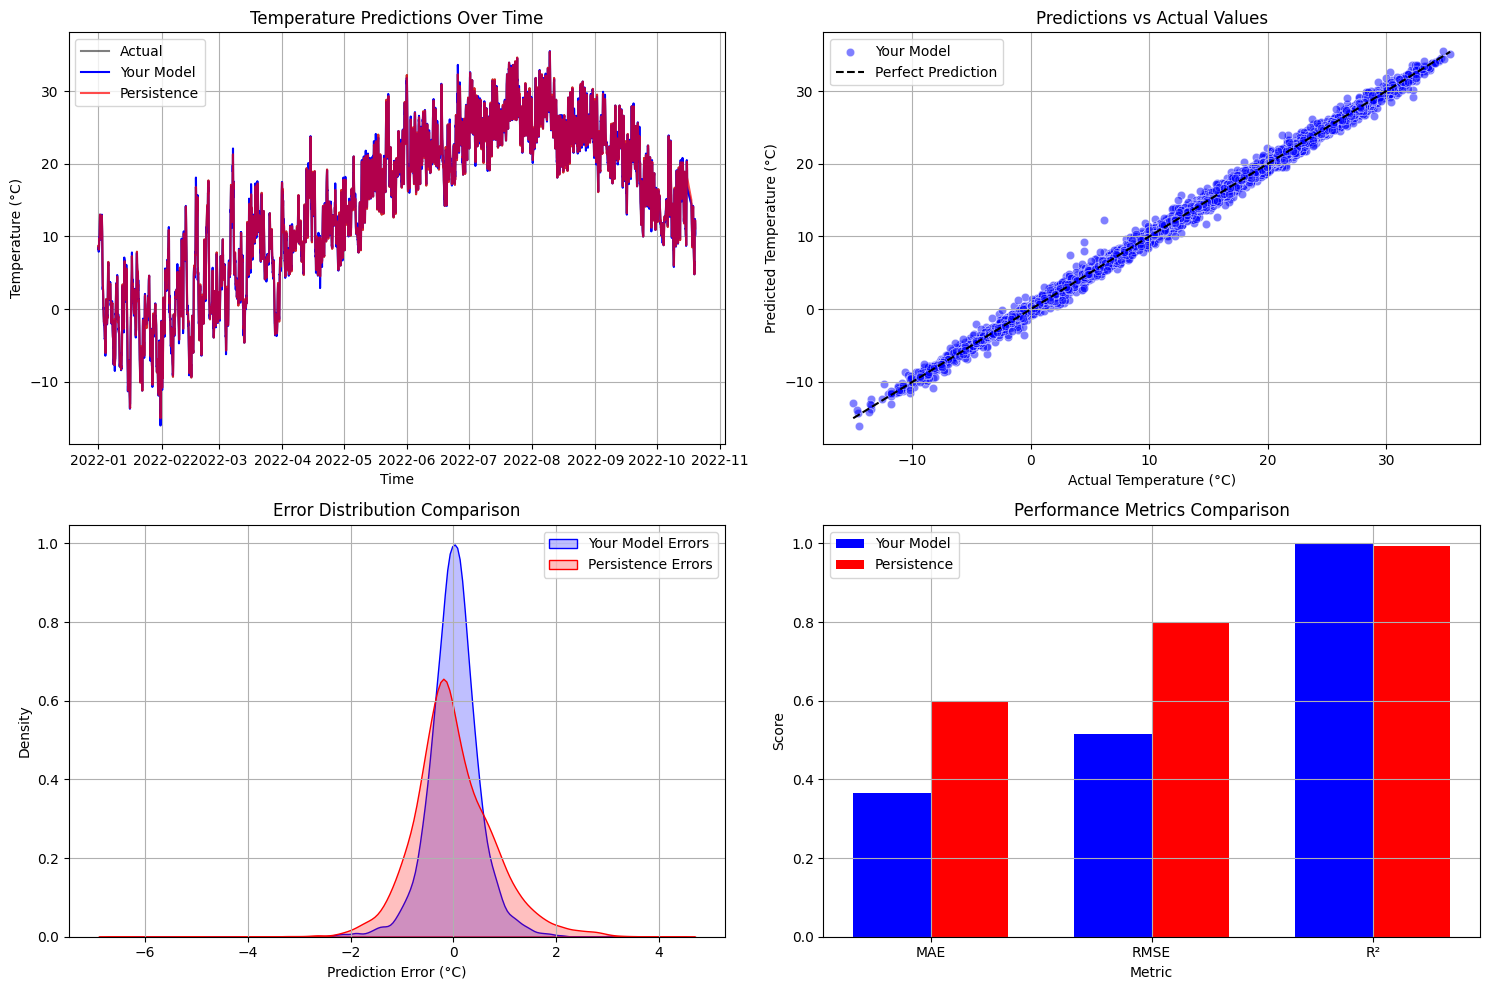

In [58]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the Markdown table
markdown_table = f"""
### Model Performance Comparison

| Metric       | Your Model   | Persistence  | 
|--------------|-------------|-------------|
| `MAE`          | {test_mae:.2f}°C | {persistence_mae:.2f}°C |
| `RMSE`         | {test_rmse:.2f}°C | {persistence_rmse:.2f}°C |
| `R²`           | {test_r2:.2f} | {persistence_r2:.2f} |
"""

display(Markdown(markdown_table))

plt.figure(figsize=(15, 10))

# Time series comparison
plt.subplot(2, 2, 1)
plt.plot(test_data['time'], test_data['target'], label='Actual', color='black', alpha=0.5)
plt.plot(test_data['time'], test_data['predicted_temperature'], label='Your Model', color='blue')
plt.plot(test_data['time'], test_data['temperature_2m (°C)'], label='Persistence', color='red', alpha=0.7)
plt.title('Temperature Predictions Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Scatter plot of predictions vs actual
plt.subplot(2, 2, 2)
sns.scatterplot(x=test_data['target'], y=test_data['predicted_temperature'], 
                label='Your Model', alpha=0.5, color='blue')
# sns.scatterplot(x=test_data['target'], y=test_data['temperature_2m (°C)'], 
#                 label='Persistence', alpha=0.5, color='red')
plt.plot([min(test_data['target']), max(test_data['target'])], 
         [min(test_data['target']), max(test_data['target'])], 
         'k--', label='Perfect Prediction')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.legend()
plt.grid(True)

# Error distribution
plt.subplot(2, 2, 3)
sns.kdeplot(test_data['target'] - test_data['predicted_temperature'], 
            label='Your Model Errors', color='blue', fill=True)
sns.kdeplot(test_data['target'] - test_data['temperature_2m (°C)'], 
            label='Persistence Errors', color='red', fill=True)
plt.title('Error Distribution Comparison')
plt.xlabel('Prediction Error (°C)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Metrics comparison
plt.subplot(2, 2, 4)
metrics = ['MAE', 'RMSE', 'R²']
your_model_scores = [test_mae, test_rmse, test_r2]
persistence_scores = [persistence_mae, persistence_rmse, persistence_r2]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, your_model_scores, width, label='Your Model', color='blue')
plt.bar(x + width/2, persistence_scores, width, label='Persistence', color='red')

plt.title('Performance Metrics Comparison')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Experimentation Summary  

Through our experimentation, we observed that:  

- **Time-based features** slightly improved the linear regression model, indicating seasonal and hourly influences on temperature.  
- **24-hour lag features** were particularly effective in capturing temporal dependencies, significantly enhancing model performance.  
- The model **outperformed the persistence baseline**, demonstrating its predictive strength.  
- **Cyclical encoding (sin & cos) for hour and month** provided additional improvements, capturing the periodic nature of temperature variations.  
- Using **the day of the month** proved to be more effective than the **day of the year**, likely because temperature fluctuations follow shorter-term patterns rather than a full-year cycle.
- **Different imputation strategies were tested**, and while the difference was small, **mean imputation performed slightly better than forward fill (ffill)**, suggesting that an overall average provides a more stable estimate than carrying forward past values. As almost all the missing values were in validation and test set, removing all the rows with missing values was also tested, however the difference is insignificant.

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(train_data[features], train_data['target'])

test_data = test_data.copy()  # Avoid SettingWithCopyWarning
test_data["predicted_temperature"] = rf_model.predict(test_data[features]).round(1)
test_data['difference'] = abs(test_data['predicted_temperature'] - test_data['target']).round(1)

exact_matches = (test_data['difference'] == 0).mean() * 100
within_01_degree = (test_data['difference'] <= 0.1).mean() * 100
within_05_degree = (test_data['difference'] <= 0.5).mean() * 100
within_1_degree = (test_data['difference'] <= 1).mean() * 100
within_2_degrees = (test_data['difference'] <= 2).mean() * 100

print("\nPrediction Accuracy:")
print(f"- Exact matches: {exact_matches:.1f}%")
print(f"- within 0.1: {within_01_degree:.1f}%")
print(f"- within 0.5: {within_05_degree:.1f}%")
print(f"- Within ±1°C: {within_1_degree:.1f}%")
print(f"- Within ±2°C: {within_2_degrees:.1f}%")
print()

test_mae = mean_absolute_error(test_data['target'], test_data["predicted_temperature"])
test_rmse = np.sqrt(mean_squared_error(test_data['target'], test_data["predicted_temperature"]))
test_r2 = r2_score(test_data['target'], test_data["predicted_temperature"])

print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R² Score: {test_r2}")

# output_cols = ['time', 'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)', 'cloudcover (%)', 
#                'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 
#                'windspeed_10m (km/h)', 'winddirection_10m (°)', 'target', 'predicted_temperature', 'difference']

# file_path = "../data/predictions/rf_test_predictions.csv"
# test_data[output_cols].to_csv(file_path, index=False)

# print(f"Test predictions saved successfully at {file_path}")


Prediction Accuracy:
- Exact matches: 10.9%
- within 0.1: 31.8%
- within 0.5: 80.7%
- Within ±1°C: 95.5%
- Within ±2°C: 99.5%

Test MAE: 0.35186889016676254
Test RMSE: 0.5048812908831554
Test R² Score: 0.99767063099746
Test predictions saved successfully at ../data/predictions/test_predictions.csv
